<a href="https://colab.research.google.com/github/abhinav-exp/Forecasting-CryptoCurrency-Prices/blob/master/CFLANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
GitHubDataLink = 'https://raw.githubusercontent.com/abhinav-exp/Forecasting-CryptoCurrency-Prices/master/Datasets/'
InputFileLink = GitHubDataLink + 'DataBTC2017.csv'
data1 = pd.read_csv(InputFileLink, header=0, index_col=0)
print(data1)

            CBBTCUSD
DATE                
2017-06-18   2515.25
2017-06-19   2596.98
2017-06-20   2725.08
2017-06-21   2643.35
2017-06-22   2679.99
...              ...
2019-08-03  10820.75
2019-08-04  10997.82
2019-08-05  11775.14
2019-08-06  11440.08
2019-08-07  12014.41

[781 rows x 1 columns]


In [4]:
data1min = data1.min()
data1max = data1.max()

normalize = lambda x: (x - data1min + 1)/(data1max - data1min + 2)
data2 = normalize(data1)
print(data2)

            CBBTCUSD
DATE                
2017-06-18  0.034073
2017-06-19  0.038680
2017-06-20  0.045901
2017-06-21  0.041294
2017-06-22  0.043360
...              ...
2019-08-03  0.502247
2019-08-04  0.512228
2019-08-05  0.556045
2019-08-06  0.537158
2019-08-07  0.569532

[781 rows x 1 columns]


In [5]:
def split_sequence(sequence, n_steps):
  X= list()
  for i in range(len(sequence) - n_steps):
    end_ix = i + n_steps
    seq_x= sequence.values[i:end_ix, 0]
    X.append(seq_x) 
  return pd.DataFrame(X)

data3 = split_sequence(data2, 10)
print(data3.shape)
print(data3)

(771, 10)
            0         1         2         3         4         5         6  \
0    0.034073  0.038680  0.045901  0.041294  0.043360  0.043967  0.037432   
1    0.038680  0.045901  0.041294  0.043360  0.043967  0.037432  0.033530   
2    0.045901  0.041294  0.043360  0.043967  0.037432  0.033530  0.028023   
3    0.041294  0.043360  0.043967  0.037432  0.033530  0.028023  0.037484   
4    0.043360  0.043967  0.037432  0.033530  0.028023  0.037484  0.036208   
..        ...       ...       ...       ...       ...       ...       ...   
766  0.441959  0.449255  0.447073  0.426045  0.430599  0.427984  0.432307   
767  0.449255  0.447073  0.426045  0.430599  0.427984  0.432307  0.461562   
768  0.447073  0.426045  0.430599  0.427984  0.432307  0.461562  0.479501   
769  0.426045  0.430599  0.427984  0.432307  0.461562  0.479501  0.486030   
770  0.430599  0.427984  0.432307  0.461562  0.479501  0.486030  0.502247   

            7         8         9  
0    0.033530  0.028023  0.03

In [6]:
train_x = data3.iloc[:int(0.85*len(data2)), :9]
train_y = data3.iloc[:int(0.85*len(data2)), 9:10]
test_x = data3.iloc[int(0.85*len(data2)):, :9]
test_y = data3.iloc[int(0.85*len(data2)):, 9:10]
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(663, 9)
(663, 1)
(108, 9)
(108, 1)


In [7]:
class CFLANN():
  def __init__(self, learn_rate):
    self.learning_rate = learn_rate
    self.weight_matrix = 2*np.random.random((9*4 + 1, 1)) - 1
  
  def func_x(self, x):
    const_x = np.ones((len(x), 1))
    orginal_x = x
    func1_x = 2*(x ** 2) - 1
    func2_x = 4*(x ** 3) - 3*x
    func3_x = 8*(x ** 4) - 8*(x ** 2) + 1
    functioned_x = np.hstack((x, func1_x, func2_x, func3_x, const_x))
    return functioned_x

  def tanh_derivative(self, x):
    return 1.0 - (np.tanh(x) ** 2)

  def forward_propagation(self, x):
    funced_x = self.func_x(x)
    return np.tanh(np.dot(funced_x, self.weight_matrix))

  def train(self, train_x, train_y, epochs):
    self.me_curve = np.array([])
    for iteration in range(epochs):
      y = self.forward_propagation(train_x)

      error = train_y - y

      adjustment=np.dot(self.learning_rate*self.func_x(train_x).T,error*self.tanh_derivative(y))

      self.weight_matrix += adjustment
      self.me_curve = np.append(self.me_curve, np.mean(error[9]**2))
      # for w in self.weight_matrix:
      #   print(str(round(w[0], 2)) + " ", end="")
      # print("epoch ")

1 => 0.7143744912798656
0.1 => 1.4414851193959033
0.001 => 0.571868442425058
0.0001 => 0.002162874686368003
1e-05 => 0.006017422133858638


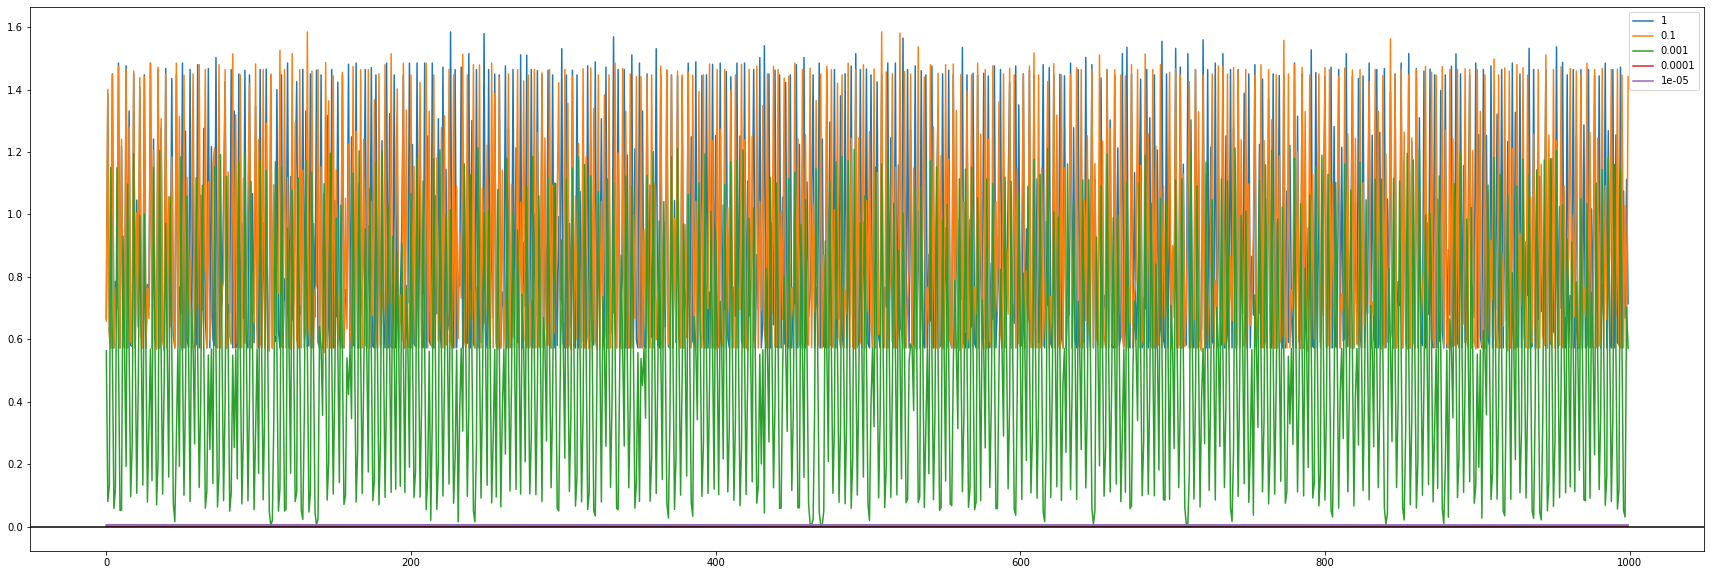

In [18]:
tuning_learning_rates = [1, 0.1, 0.001, 0.0001, 0.00001]

plt.figure(figsize = (30, 10))

for t in tuning_learning_rates:
  m = CFLANN(t)
  m.train(train_x = train_x, train_y = train_y, epochs = 10000)
  ec = m.me_curve[-1001:-1]
  print(str(t) + " => " + str(ec[-1]))
  plt.plot(ec)

plt.legend([str(u) for u in tuning_learning_rates])
plt.axhline(y=0, c="black", label="y=0")
plt.show()

0.0005 => 0.1946698646181592
0.00045 => 0.41549261864341164
0.0004 => 0.03928280997526033
0.00035 => 0.09092040202146237
0.0003 => 0.0868710341916696
0.00025 => 0.0008641131245495421
0.0002 => 0.0012321005009654255
0.00015 => 0.0010284135966254532
0.0001 => 0.0016453955625967632
5e-05 => 0.0020672746320417224


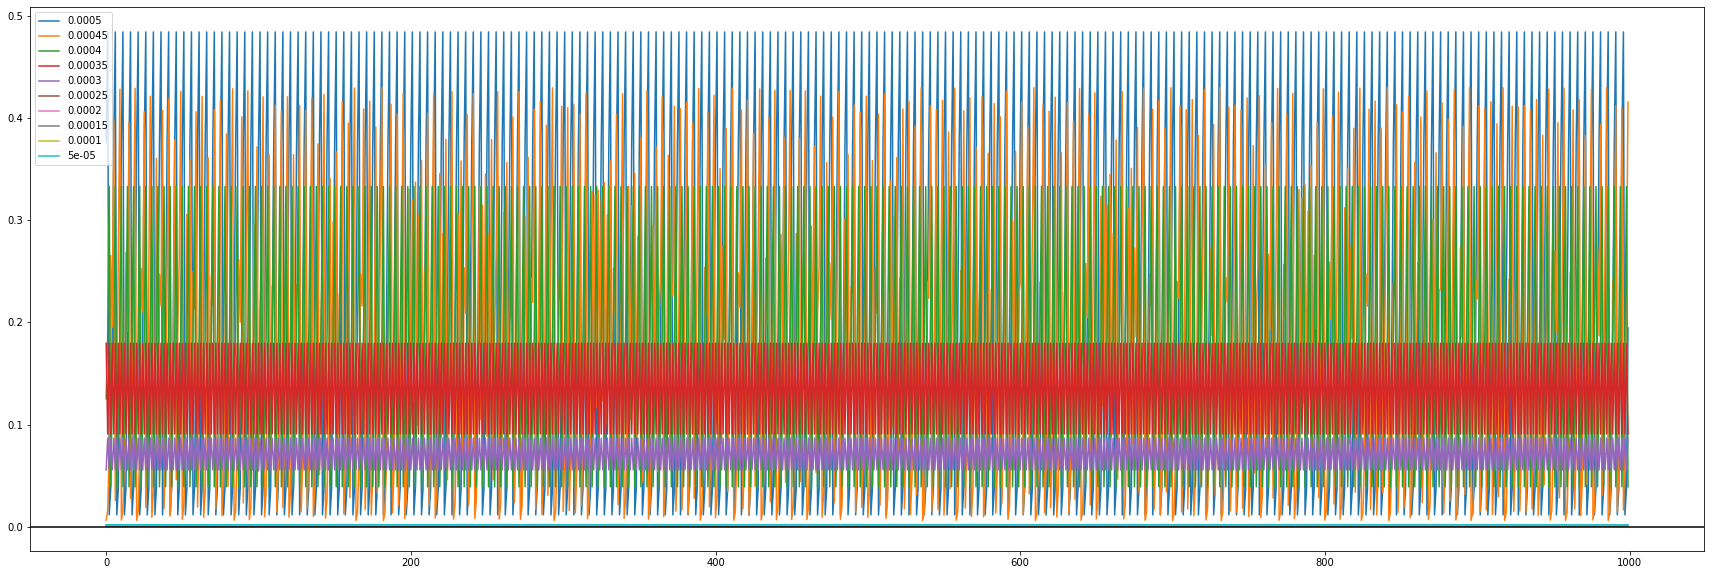

In [25]:
tuning_learning_rates = [0.0005, 0.00045, 0.0004, 0.00035, 0.0003, 0.00025, 0.0002, 0.00015, 0.0001, 0.00005]

plt.figure(figsize = (30, 10))

for t in tuning_learning_rates:
  m = CFLANN(t)
  m.train(train_x = train_x, train_y = train_y, epochs = 10000)
  ec = m.me_curve[-1001:-1]
  print(str(t) + " => " + str(ec[-1]))
  plt.plot(ec)

plt.legend([str(u) for u in tuning_learning_rates])
plt.axhline(y=0, c="black", label="y=0")
plt.show()

In [26]:
model = CFLANN(0.00025)
model.train(train_x = train_x, train_y = train_y, epochs = 10000)
preds = model.forward_propagation(test_x)
print(preds.shape)

(108, 1)


0.0007372216582907488


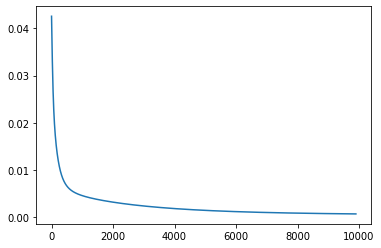

In [27]:
error_curve = model.me_curve[100:]
print(error_curve[-1])
plt.plot(error_curve)
plt.show()

In [28]:
preds[:, 0]

array([0.19072471, 0.19014756, 0.19045408, 0.19357507, 0.2055535 ,
       0.19898655, 0.17758715, 0.1836459 , 0.18787591, 0.18086012,
       0.18043227, 0.18958828, 0.19376073, 0.19284174, 0.21194814,
       0.2174603 , 0.21003816, 0.21057893, 0.21695147, 0.22983523,
       0.23975919, 0.2601936 , 0.30697072, 0.30173607, 0.34238812,
       0.36593802, 0.33882535, 0.32939145, 0.28329562, 0.34577182,
       0.36062249, 0.33599147, 0.30470848, 0.33521488, 0.35598468,
       0.366664  , 0.34774414, 0.40629988, 0.3863402 , 0.38251944,
       0.37328338, 0.36626846, 0.39076956, 0.37454556, 0.35465576,
       0.32330026, 0.31238489, 0.35825014, 0.3306745 , 0.34014321,
       0.31282799, 0.33748595, 0.36069364, 0.35012885, 0.35407859,
       0.37809327, 0.3948445 , 0.41683426, 0.40867324, 0.42820572,
       0.41102098, 0.43842146, 0.47517168, 0.50758823, 0.52072955,
       0.51120911, 0.58332193, 0.66003447, 0.53028267, 0.57960004,
       0.57428387, 0.52139658, 0.43931569, 0.54640625, 0.49474

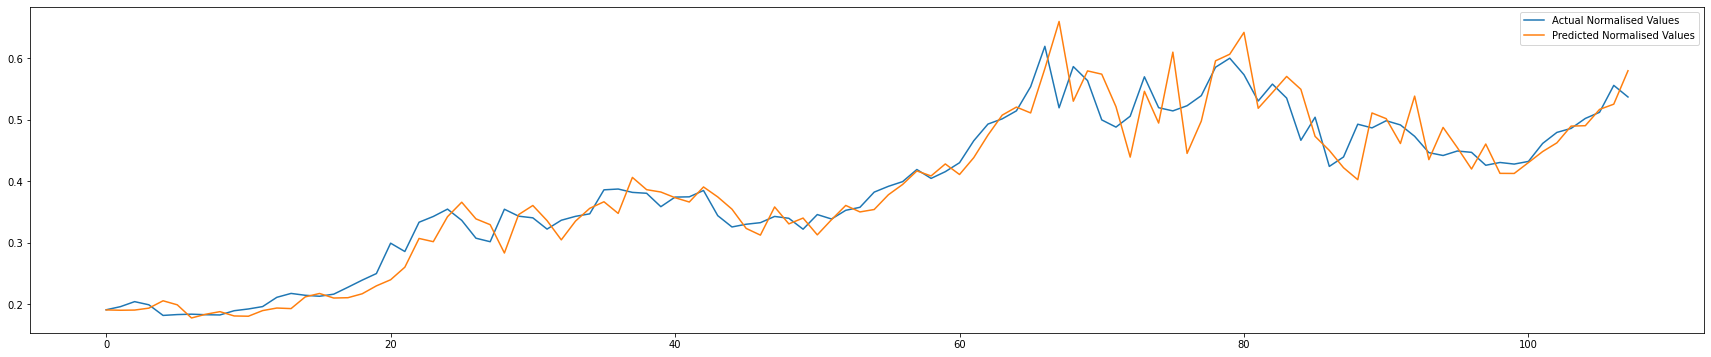

In [29]:
plt.figure(figsize=(30, 6))
plt.plot(test_y.reset_index()[9])
plt.plot(preds)
plt.legend(["Actual Normalised Values", "Predicted Normalised Values"])
plt.show()
     

In [30]:
d1 = (data1max - data1min + 2)[0]
# print(type(d1))
denormalized_preds = (preds*d1)[:,0]
# print(denormalized_preds)
denormalized_preds += (data1min + 1)[0]
# print(denormalized_preds)
preds1 = pd.DataFrame(denormalized_preds)
preds1['DATE'] = data1.index[-1*len(preds1):]
preds1 = preds1.set_index('DATE')
print(preds1)

                       0
DATE                    
2019-04-22   5296.280222
2019-04-23   5286.041436
2019-04-24   5291.479160
2019-04-25   5346.846336
2019-04-26   5559.346284
...                  ...
2019-08-03  10601.332365
2019-08-04  10613.095725
2019-08-05  11083.227231
2019-08-06  11234.480135
2019-08-07  12199.726208

[108 rows x 1 columns]


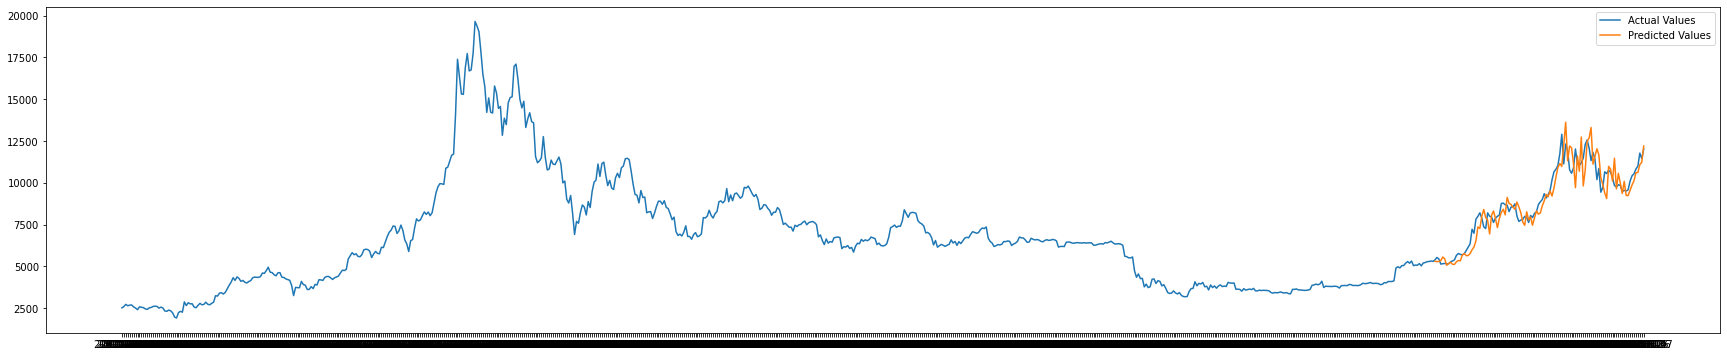

In [31]:
plt.figure(figsize=(30, 6))
plt.plot(data1)
plt.plot(preds1)
plt.legend(["Actual Values", "Predicted Values"])
plt.show()

In [32]:
mse = np.mean((np.array(preds1[0]) - np.array(data1.iloc[-1*(len(preds1)):, 0]))**2)
print("mse  "+ str(mse))
print("rmse "+ str(np.sqrt(mse)))

mse  569309.9732961968
rmse 754.5263237927467
